The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

 [![TITANIC sinking](https://i.imgur.com/8Rmg0vy.jpg)](https://youtu.be/9xoqXVjBEF8 "TITANIC sinking")

### Data

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include **gender_submission.csv**, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

### Data Dictionary

<center>
<table class="table table-bordered">
<tr>
<th style="width:5%">Variable</th><th style="width:5%">Definition</th><th style="width:5%">Key</th>
</tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</table>
</center>

# Wrangling & EDA

## 1. Loading Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## 2. Loading Data & Basic Analysis

In [3]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
dftrain = data_train.copy()
dftest = data_test.copy()

### Basic Structure

In [4]:
dftrain.shape

(891, 12)

In [5]:
dftest.shape

(418, 11)

In [6]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
dftrain.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
dftest.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
dftrain.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Goodwin, Miss. Lillian Amy",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [12]:
dftrain.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Goodwin, Miss. Lillian Amy",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Completeness

In [13]:
dftrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
dftest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 3. Exploration

### 3.1 Exploration of Complete & Important Variables

Our response variable in the training set is complete, as well as Sex and Pclass, which seem two of the most important predictors.

**Survival**

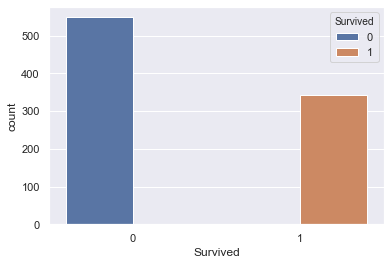

In [15]:
sns.countplot(x='Survived', hue='Survived', data=dftrain);

**Gender & Survival**

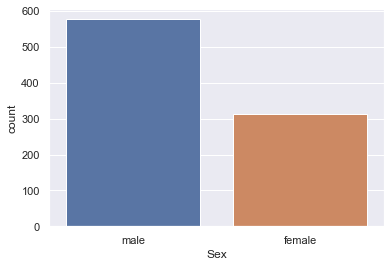

In [16]:
sns.countplot(x='Sex', data=dftrain);

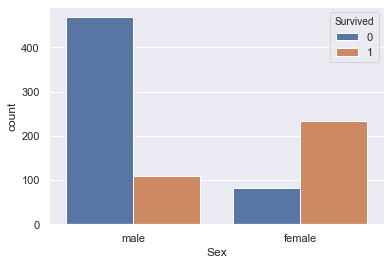

In [17]:
sns.countplot(x='Sex', hue='Survived', data=dftrain);

**Passenger Class & Survival**

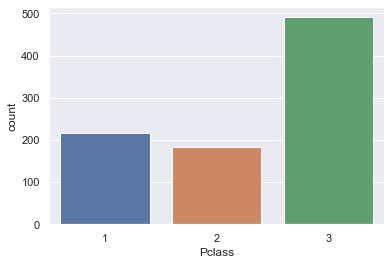

In [18]:
sns.countplot(x='Pclass', data=dftrain);

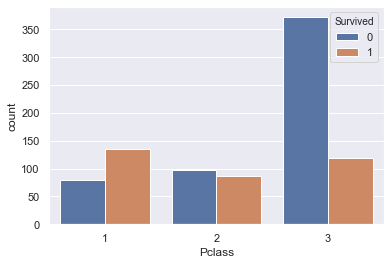

In [19]:
sns.countplot(x='Pclass', hue='Survived', data=dftrain);

**Passenger Class, Gender & Survival**

C:\Users\Mudasser Afzal\Anaconda3\envs\testing\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


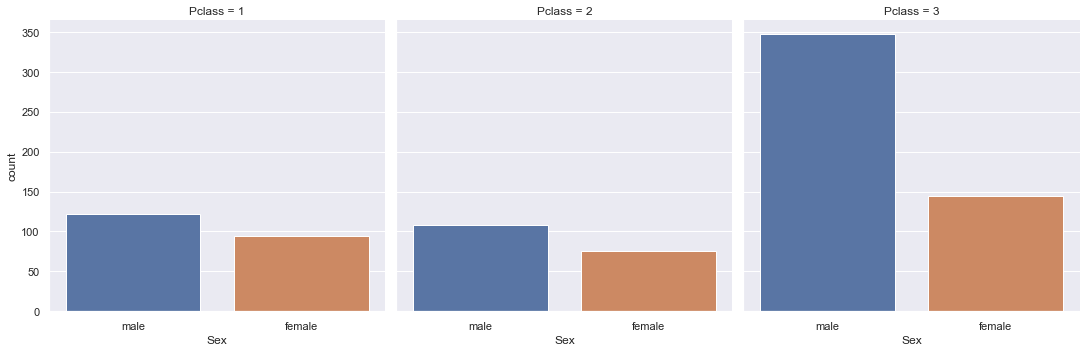

In [20]:
sns.factorplot(x='Sex', col='Pclass', data=dftrain, kind='count');

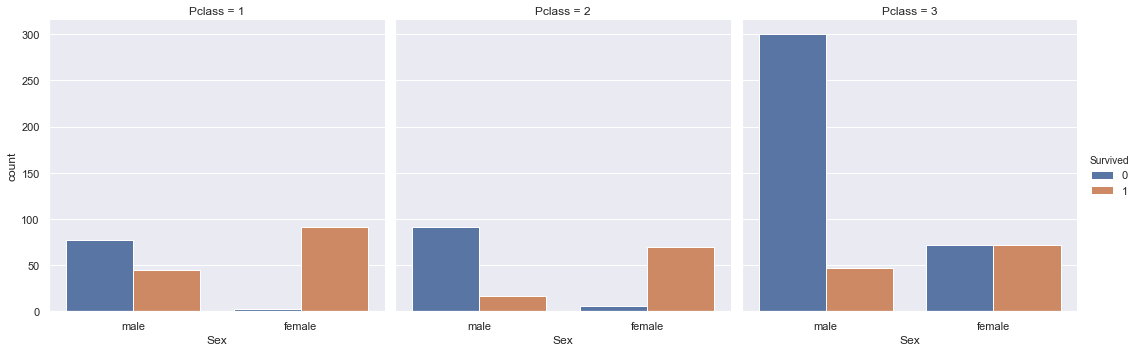

In [21]:
sns.factorplot(x='Sex', col='Pclass', hue='Survived', data=dftrain, kind='count');

### 3.2 What's in the name?

In [22]:
dftrain['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

**Extracting & Analyzing Titles**

In [23]:
import re
dftrain['Title'] = dftrain['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [24]:
dftrain['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Sir           1
Capt          1
Ms            1
Don           1
Lady          1
Mme           1
Jonkheer      1
Name: Title, dtype: int64

___Dividing Titles into bigger categories___

The term *Mademoiselle* is a French familiar title, abbreviated **Mlle**, traditionally given to an unmarried woman. The equivalent in English is "Miss". However, the courtesy title "Madame" is accorded women where their marital status is unknown.

In [25]:
dftrain['Title'] = dftrain['Title'].replace('Mlle', 'Miss')

In France, one traditionally calls a young, unmarried woman Mademoiselle – Mlle for short – and an older, married woman _Madame_, whose abbreviation is **Mme**.

In [26]:
dftrain['Title'] = dftrain['Title'].replace('Mme', 'Mrs')

In [27]:
dftrain.loc[(~dftrain['Title'].isin(['Mr', 'Mrs', 'Miss', 'Master'])), 'Title'] = 'Rare Title'

In [28]:
dftrain['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare Title'], dtype=object)

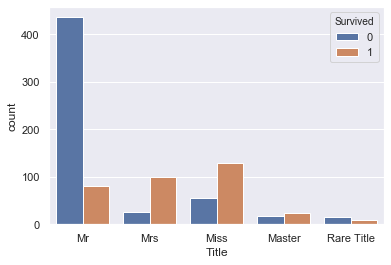

In [29]:
sns.countplot(data=dftrain,x='Title', hue='Survived');

Performing same task on test data set

In [30]:
dftest['Title'] = dftest['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
dftest['Title'] = dftest['Title'].replace('Mlle', 'Miss')
dftest['Title'] = dftest['Title'].replace('Mme', 'Mrs')
dftest.loc[(~dftest['Title'].isin(['Mr', 'Mrs', 'Miss', 'Master'])), 'Title'] = 'Rare Title'
dftest['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare Title'], dtype=object)

### 3.3 Travelling Alone vs. Travelling in groups

**3.3.1 Family Size**

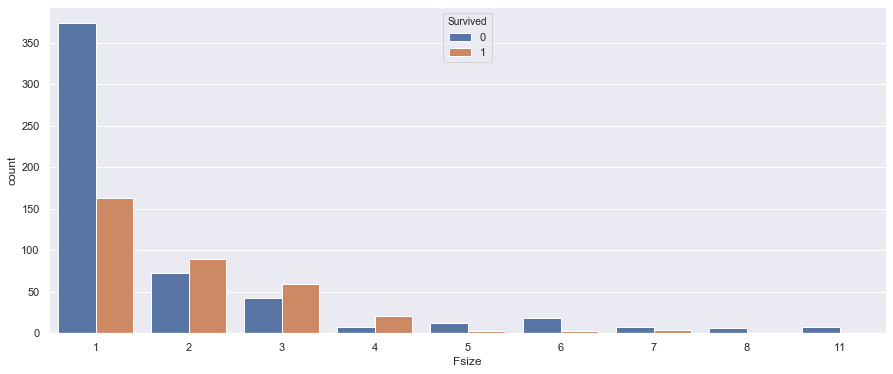

In [31]:
dftrain['Fsize'] = dftrain['SibSp'] + dftrain['Parch']+1
plt.figure(figsize=(15,6));
sns.countplot(x='Fsize', hue='Survived', data=dftrain);

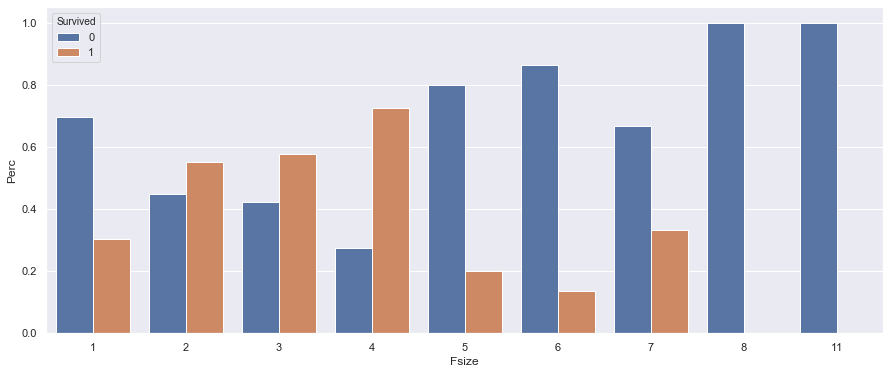

In [32]:
temp = dftrain.groupby('Fsize')['Survived'].value_counts(normalize=True).reset_index(name='Perc')

plt.figure(figsize=(15,6));

sns.barplot(data=temp,x='Fsize', y='Perc', hue='Survived', dodge=True);

**3.3.2 How many people booked together?**

_Apart from families, there could be groups of friends travelling together._

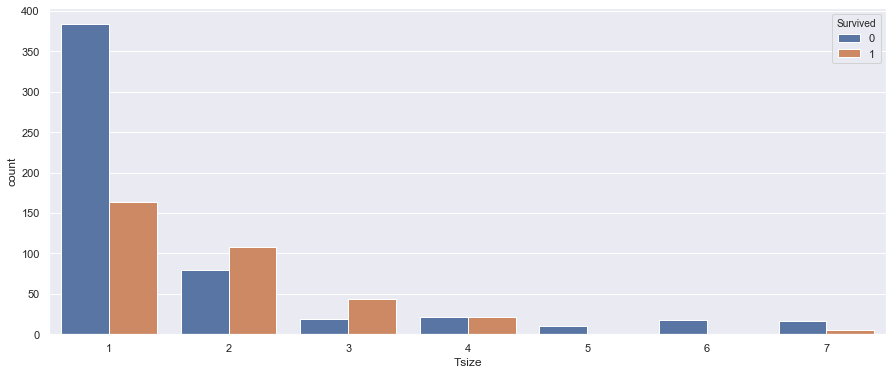

In [33]:
temp = dftrain['Ticket'].value_counts().reset_index(name='Tsize')
dftrain = dftrain.merge(temp, left_on='Ticket', right_on='index',how='inner').drop('index', axis=1)
plt.figure(figsize=(15,6));
sns.countplot(x='Tsize', hue='Survived', data=dftrain);

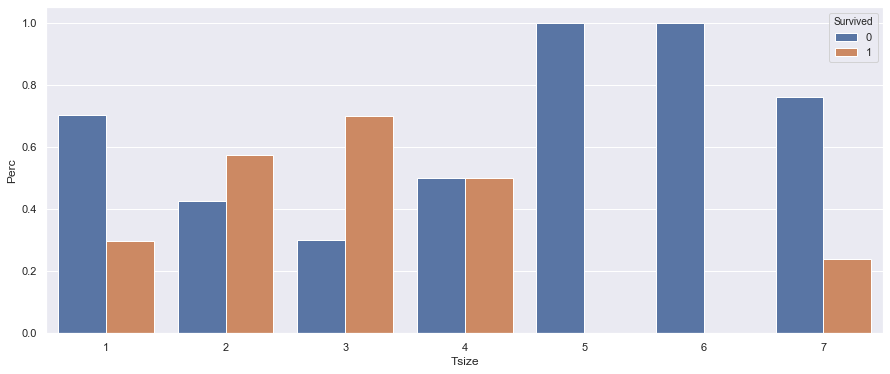

In [34]:
temp = dftrain.groupby('Tsize')['Survived'].value_counts(normalize=True).reset_index(name='Perc')

plt.figure(figsize=(15,6));
sns.barplot(x='Tsize', y='Perc', hue='Survived', data=temp, dodge=True);


**3.3.3 Consolidating family & friends**

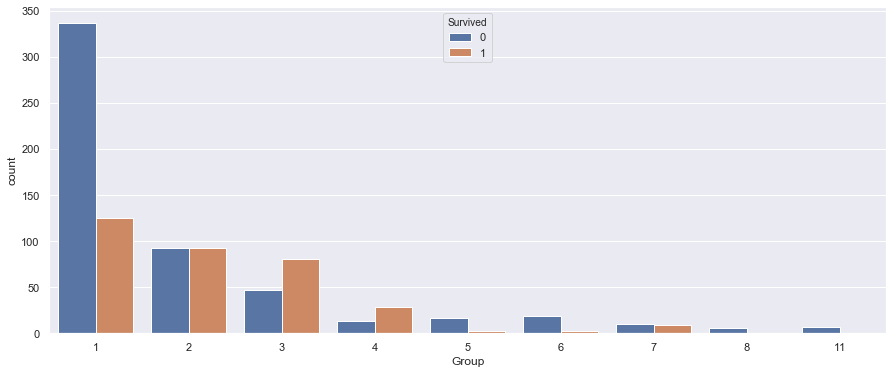

In [35]:
dftrain['Group'] = dftrain[['Tsize', 'Fsize']].max(axis=1)

plt.figure(figsize=(15,6));
sns.countplot(x='Group', hue='Survived', data=dftrain);

In [36]:
dftrain['GrpSize'] = ''
dftrain.loc[dftrain['Group']==1, 'GrpSize'] = dftrain.loc[dftrain['Group']==1, 'GrpSize'].replace('', 'solo')
dftrain.loc[dftrain['Group']==2, 'GrpSize'] = dftrain.loc[dftrain['Group']==2, 'GrpSize'].replace('', 'couple')
dftrain.loc[(dftrain['Group']<=4) & (dftrain['Group']>=3), 'GrpSize'] = dftrain.loc[(dftrain['Group']<=4) & (dftrain['Group']>=3), 'GrpSize'].replace('', 'group')
dftrain.loc[dftrain['Group']>4, 'GrpSize'] = dftrain.loc[dftrain['Group']>4, 'GrpSize'].replace('', 'large group')
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,2,couple
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,2,couple
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,solo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2,couple
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,Mr,2,2,2,couple


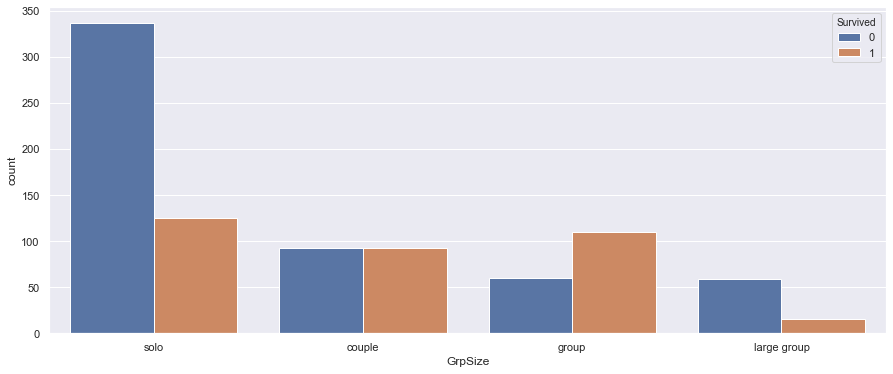

In [37]:
plt.figure(figsize=(15,6));
sns.countplot(x='GrpSize', order=['solo', 'couple', 'group', 'large group'], hue='Survived', data=dftrain);

Applying same transformation on test dataset

In [38]:
dftest['Fsize'] = dftest['SibSp'] + dftest['Parch']+1
temp = dftest['Ticket'].value_counts().reset_index(name='Tsize')
dftest = dftest.merge(temp, left_on='Ticket', right_on='index',how='inner').drop('index', axis=1)
dftest['Group'] = dftest[['Tsize', 'Fsize']].max(axis=1)
dftest['GrpSize'] = ''
dftest.loc[dftest['Group']==1, 'GrpSize'] = dftest.loc[dftest['Group']==1, 'GrpSize'].replace('', 'solo')
dftest.loc[dftest['Group']==2, 'GrpSize'] = dftest.loc[dftest['Group']==2, 'GrpSize'].replace('', 'couple')
dftest.loc[(dftest['Group']<=4) & (dftest['Group']>=3), 'GrpSize'] = dftest.loc[(dftest['Group']<=4) & (dftest['Group']>=3), 'GrpSize'].replace('', 'group')
dftest.loc[dftest['Group']>4, 'GrpSize'] = dftest.loc[dftest['Group']>4, 'GrpSize'].replace('', 'large group')
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1,1,solo
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,1,2,couple
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,1,1,solo
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,1,1,solo
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,1,3,group


### 3.4 Effect of Fare

In [39]:
dftrain['Fare'].isnull().sum()

0

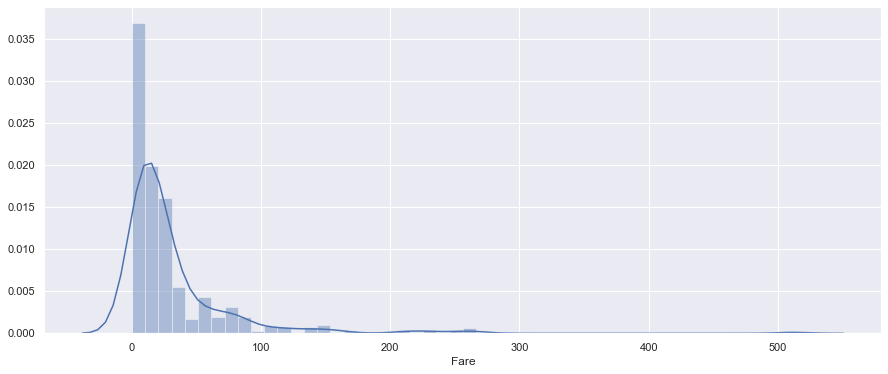

In [40]:
plt.subplots(figsize=(15,6))
sns.distplot(dftrain['Fare']);

In [41]:
dftrain[dftrain['Fare'] < 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize


In [42]:
dftrain[dftrain['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize
266,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr,1,4,4,group
267,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr,1,4,4,group
268,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr,1,4,4,group
269,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr,1,4,4,group
366,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Mr,1,1,1,solo
386,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,Mr,1,3,3,group
387,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,Mr,1,3,3,group
388,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,Mr,1,3,3,group
592,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,Mr,1,1,1,solo
715,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,Mr,1,1,1,solo


In [43]:
dftrain.loc[(dftrain['Fare'] == 0) & (dftrain['Pclass'] == 1), 'Fare'] = dftrain[dftrain['Pclass'] == 1]['Fare'].mean()
dftrain.loc[(dftrain['Fare'] == 0) & (dftrain['Pclass'] == 2), 'Fare'] = dftrain[dftrain['Pclass'] == 2]['Fare'].mean()
dftrain.loc[(dftrain['Fare'] == 0) & (dftrain['Pclass'] == 3), 'Fare'] = dftrain[dftrain['Pclass'] == 3]['Fare'].mean()

In [44]:
dftrain['FareCat'] = ''
dftrain.loc[dftrain['Fare']<=10, 'FareCat'] = '0-10'
dftrain.loc[(dftrain['Fare']>10) & (dftrain['Fare']<=25), 'FareCat'] = '10-25'
dftrain.loc[(dftrain['Fare']>25) & (dftrain['Fare']<=40), 'FareCat'] = '25-40'
dftrain.loc[(dftrain['Fare']>40) & (dftrain['Fare']<=70), 'FareCat'] = '40-70'
dftrain.loc[(dftrain['Fare']>70) & (dftrain['Fare']<=100), 'FareCat'] = '70-100'
dftrain.loc[dftrain['Fare']>100, 'FareCat'] = '100+'
dftrain[['Fare', 'FareCat']].head()

,Fare,FareCat
0,7.2500,0-10
1,71.2833,70-100
2,7.9250,0-10
3,53.1000,40-70
4,53.1000,40-70


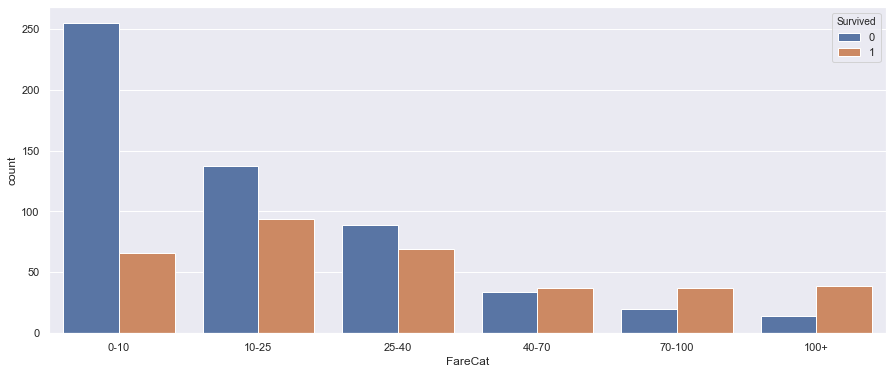

In [45]:
plt.subplots(figsize=(15,6))
sns.countplot(x='FareCat', order=['0-10', '10-25', '25-40', '40-70', '70-100', '100+'], hue='Survived', data=dftrain);

Applying same changes on test data set

In [46]:
dftest.loc[(dftest['Fare'] == 0) & (dftest['Pclass'] == 1), 'Fare'] = dftest[dftest['Pclass'] == 1]['Fare'].mean()
dftest.loc[(dftest['Fare'] == 0) & (dftest['Pclass'] == 2), 'Fare'] = dftest[dftest['Pclass'] == 2]['Fare'].mean()
dftest.loc[(dftest['Fare'] == 0) & (dftest['Pclass'] == 3), 'Fare'] = dftest[dftest['Pclass'] == 3]['Fare'].mean()
dftest['FareCat'] = ''
dftest.loc[dftest['Fare']<=10, 'FareCat'] = '0-10'
dftest.loc[(dftest['Fare']>10) & (dftest['Fare']<=25), 'FareCat'] = '10-25'
dftest.loc[(dftest['Fare']>25) & (dftest['Fare']<=40), 'FareCat'] = '25-40'
dftest.loc[(dftest['Fare']>40) & (dftest['Fare']<=70), 'FareCat'] = '40-70'
dftest.loc[(dftest['Fare']>70) & (dftest['Fare']<=100), 'FareCat'] = '70-100'
dftest.loc[dftest['Fare']>100, 'FareCat'] = '100+'
dftest[['Fare', 'FareCat']].head()

,Fare,FareCat
0,7.8292,0-10
1,7.0000,0-10
2,9.6875,0-10
3,8.6625,0-10
4,12.2875,10-25


### 3.5 Effect of Embarked variable

_C = Cherbourg(France), Q = Queenstown(Ireland), S = Southampton(England)_

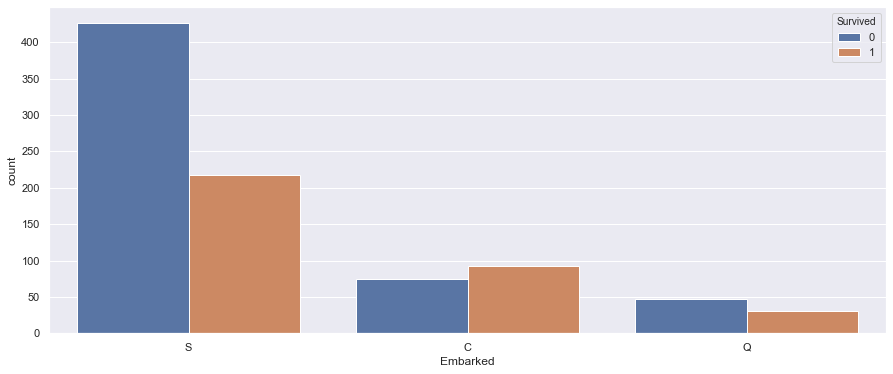

In [47]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Embarked', hue='Survived', data=dftrain);

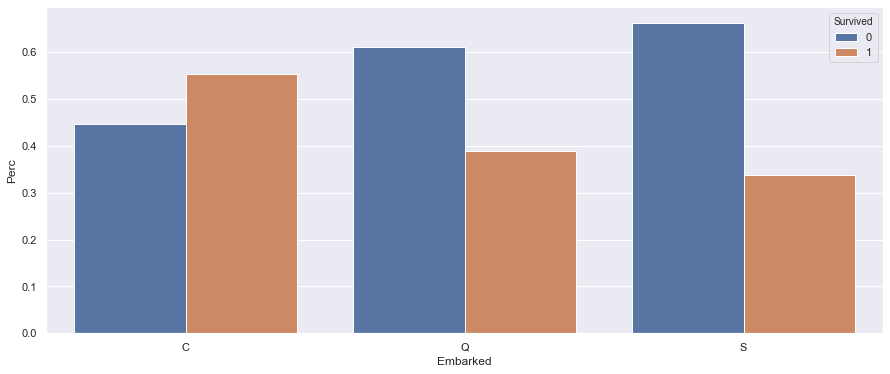

In [48]:
temp = dftrain.groupby('Embarked')['Survived'].value_counts(normalize=True).reset_index(name='Perc')
plt.subplots(figsize=(15,6))
sns.barplot(x='Embarked', y='Perc', hue='Survived', data=temp, dodge=True);


***Engineered Features***

In [49]:
dftrain.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize,FareCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,2,couple,0-10
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,2,couple,70-100


In [50]:
dftest.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize,FareCat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1,1,solo,0-10
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,1,2,couple,0-10


## 4. Missing Values

### 4.1 Age

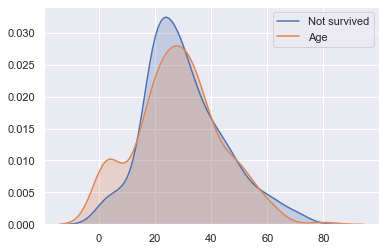

In [51]:
sns.kdeplot(dftrain[dftrain['Survived'] == 0]['Age'].dropna(), shade=True,label="Not survived");
sns.kdeplot(dftrain[dftrain['Survived'] == 1]['Age'].dropna(), shade=True);

In [52]:
temp = dftrain[dftrain['Age'].isnull() == False]

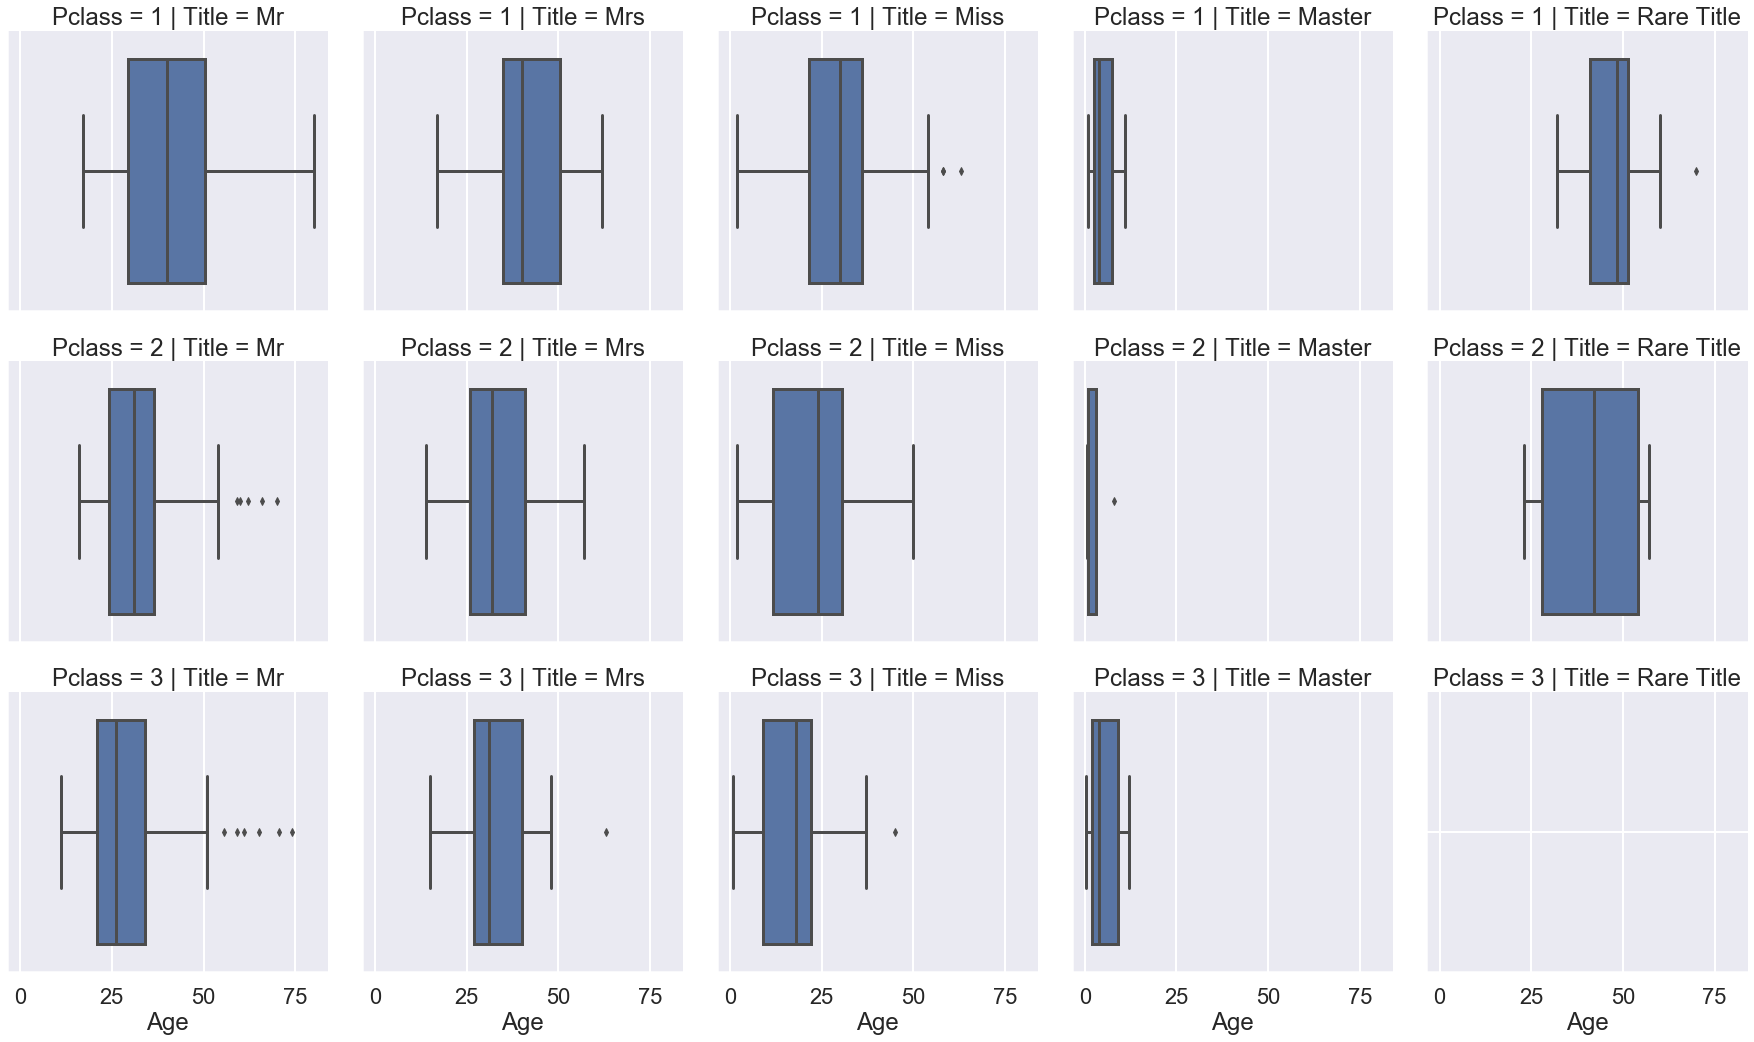

In [53]:
sns.set_context('poster')
sns.factorplot(kind='box', x='Age', col='Title', row='Pclass', data=temp);

In [54]:
for t in dftrain['Title'].unique():
    for p in dftrain['Pclass'].unique():
        dftrain.loc[(dftrain['Title'] == t) & (dftrain['Pclass'] == p) & (dftrain['Age'].isnull()), 'Age'] = dftrain.loc[(dftrain['Title'] == t) & (dftrain['Pclass'] == p), 'Age'].median()

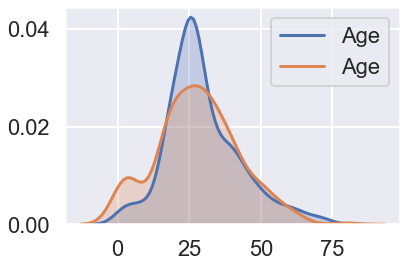

In [55]:
sns.kdeplot(dftrain[dftrain['Survived'] == 0]['Age'], shade=True);
sns.kdeplot(dftrain[dftrain['Survived'] == 1]['Age'], shade=True);

In [56]:
dftrain['Age'].isnull().sum()

0

Creating Age categories

In [57]:
dftrain['AgeCat']=''
dftrain.loc[ dftrain['Age'] <= 16, 'AgeCat'] = '0-16'
dftrain.loc[(dftrain['Age'] > 16) & (dftrain['Age'] <= 32), 'AgeCat'] = '16-32'
dftrain.loc[(dftrain['Age'] > 32) & (dftrain['Age'] <= 48), 'AgeCat'] = '32-48'
dftrain.loc[(dftrain['Age'] > 48) & (dftrain['Age'] <= 64), 'AgeCat'] = '48-64'
dftrain.loc[ dftrain['Age'] > 64, 'AgeCat']= '64+'

Replacing missing Age & Fair values in test data

In [58]:
for t in dftest['Title'].unique():
    for p in dftest['Pclass'].unique():
        dftest.loc[(dftest['Title'] == t) & (dftest['Pclass'] == p) & (dftest['Age'].isnull()), 'Age'] = dftest.loc[(dftest['Title'] == t) & (dftest['Pclass'] == p), 'Age'].median()

In [59]:
dftest.loc[(dftest['Age'].isnull()) & (dftest['Pclass'] == 3), 'Age'] = dftest[dftest['Pclass'] == 3]['Age'].median()
dftest.loc[(dftest['Fare'].isnull()) & (dftest['Pclass'] == 3), 'Fare'] = dftest[dftest['Pclass'] == 3]['Fare'].mean()

In [60]:
dftest.loc[(dftest['Fare']>10) & (dftest['Fare']<=25), 'FareCat'] = '10-25'

In [61]:
dftest['AgeCat']=''
dftest.loc[ dftest['Age'] <= 16, 'AgeCat'] = '0-16'
dftest.loc[(dftest['Age'] > 16) & (dftest['Age'] <= 32), 'AgeCat'] = '16-32'
dftest.loc[(dftest['Age'] > 32) & (dftest['Age'] <= 48), 'AgeCat'] = '32-48'
dftest.loc[(dftest['Age'] > 48) & (dftest['Age'] <= 64), 'AgeCat'] = '48-64'
dftest.loc[ dftest['Age'] > 64, 'AgeCat']= '64+'

### 4.2 Embarkment

In [62]:
dftrain.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked,Title,GrpSize,FareCat,AgeCat
count,891,891,891,204,889,891,891,891,891
unique,891,2,681,147,3,5,4,6,5
top,"Goodwin, Miss. Lillian Amy",male,CA. 2343,C23 C25 C27,S,Mr,solo,0-10,16-32
freq,1,577,7,4,644,517,462,321,490


In [63]:
dftrain.loc[(dftrain['Embarked'].isnull()),'Embarked']='S'

### 4.3 Dropping Cabin

In [64]:
dftrain.drop('Cabin',axis=1,inplace=True)

In [65]:
dftest.drop('Cabin',axis=1,inplace=True)

Checking missing values in training data

In [140]:
dftrain.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Fsize          0
Tsize          0
Group          0
GrpSize        0
FareCat        0
dtype: int64

Checking missing values in testing data

In [141]:
dftest.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Fsize          0
Tsize          0
Group          0
GrpSize        0
FareCat        0
dtype: int64

## 5. Feature Selection

In [143]:
sns.set_context('poster')

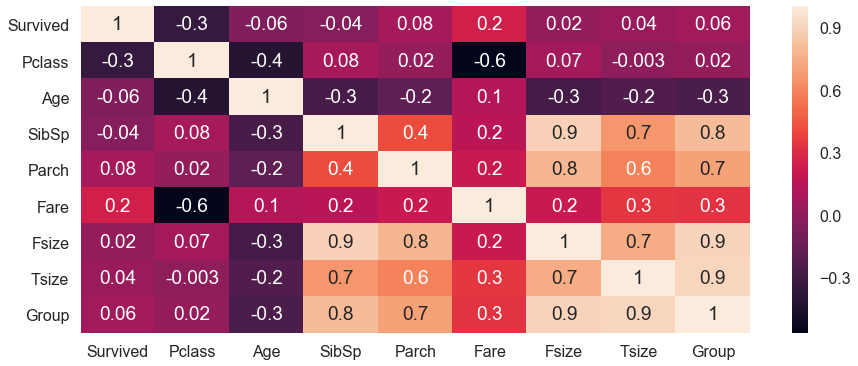

In [147]:
sns.set_context('poster')
plt.figure(figsize=(15,6))
cor = dftrain.drop('PassengerId',axis=1).corr()
sns.heatmap(cor, annot=True, fmt='.1g');

In [157]:
dftrain.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Group,GrpSize,FareCat,AgeCat
0,1,0,3,male,1,0,S,Mr,2,couple,0-10,16-32
1,2,1,1,female,1,0,C,Mrs,2,couple,70-100,32-48
2,3,1,3,female,0,0,S,Miss,1,solo,0-10,16-32
3,4,1,1,female,1,0,S,Mrs,2,couple,40-70,32-48
4,138,0,1,male,1,0,S,Mr,2,couple,40-70,32-48


In [153]:
drop_features = ['Name','Age','Fare','Ticket','Fsize','Tsize']

Selecting final features

In [154]:
dftrain.drop(drop_features,axis=1,inplace=True)

In [155]:
dftest.drop(drop_features,axis=1,inplace=True)

Export final train and test dataset in csv file

In [159]:
dftrain.to_csv('train_clean.csv',index=False)
dftest.to_csv('test_clean.csv',index=False)